# MA Crossover Strategy


Trend-following strategies believe that "the trend is your friend," and use signals to indicate the trend and profit by riding it.

You want to build and backtest a trend-following strategy.

First, you decide to use two EMAs (exponential moving averages) to construct the signal. When the shorter-term EMA, EMA_short, is larger than the longer-term EMA, EMA_long, you will enter long positions in the market. Vice versa, when EMA_short is smaller than EMA_long, you will enter short positions.

A 10-day EMA and 40-day EMA have been pre-calculated and saved in EMA_short and EMA_long. The historical price data of the Google stock has been preloaded in price_data. In addition, the bt package has been imported for you.

In [38]:
import pandas as pd
import bt
import matplotlib.pyplot as plt
import talib

In [4]:
stock_data = pd.read_csv("../../assets/GOOG.csv", index_col='Date', parse_dates=True)

## Practice Data

In [5]:
price_data = stock_data[['Close']]

## Calculate the indicators

In [6]:
ema_short = talib.EMA(price_data['Close'], timeperiod=10)
ema_long = talib.EMA(price_data['Close'], timeperiod=40)

In [19]:
ema_long.head()

Date
2015-12-29   NaN
2015-12-30   NaN
2015-12-31   NaN
2016-01-04   NaN
2016-01-05   NaN
dtype: float64

In [20]:
ema_short.head()

Date
2015-12-29   NaN
2015-12-30   NaN
2015-12-31   NaN
2016-01-04   NaN
2016-01-05   NaN
dtype: float64

## Construct the signal

In [21]:

signal = ema_long.copy()
signal[ema_long.isnull()] = 0

signal[ema_short > ema_long] = 1
signal[ema_short <= ema_long] = -1



In [31]:
signal.head()

Date
2015-12-29    0.0
2015-12-30    0.0
2015-12-31    0.0
2016-01-04    0.0
2016-01-05    0.0
dtype: float64

## Plot the signals

In [32]:
combined_df = bt.merge(signal, price_data, ema_short, ema_long)

In [33]:
combined_df.columns = ['Signal', 'Price', 'EMA Short', 'EMA Long']

In [34]:
combined_df.head()

,Signal,Price,EMA Short,EMA Long
Date,,,,
2015-12-29,0.0,776.60,NaN,NaN
2015-12-30,0.0,771.00,NaN,NaN
2015-12-31,0.0,758.88,NaN,NaN
2016-01-04,0.0,741.84,NaN,NaN
2016-01-05,0.0,742.58,NaN,NaN


<Axes: xlabel='Date'>

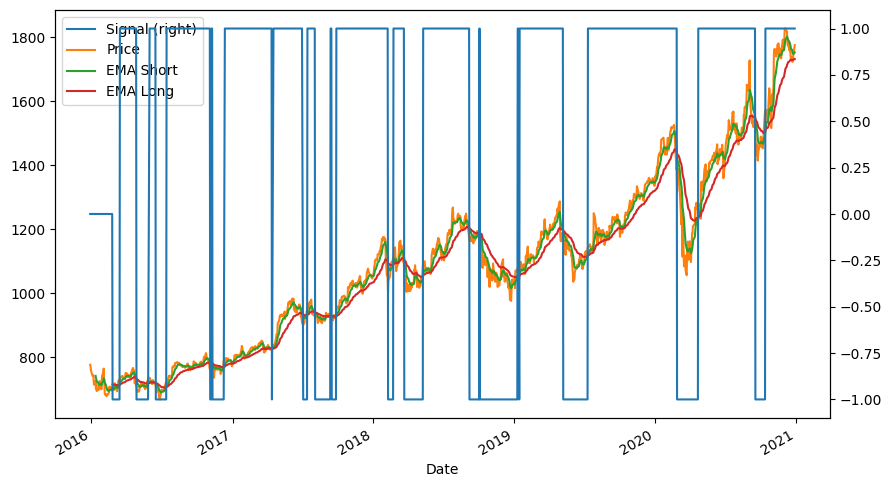

In [35]:
combined_df.plot(secondary_y=['Signal'], figsize=(10, 6))

## Backtest the strategy

In [27]:

bt_strategy = bt.Strategy('MA_Crossover',
                          [bt.algos.WeighTarget(signal),
                           bt.algos.Rebalance()]
                          )

## Create the backtest

In [28]:

bt_backtest = bt.Backtest(bt_strategy, price_data)


## Run the backtest

In [36]:

bt_result = bt.run(bt_backtest)

100%|██████████| 1/1 [00:00<00:00, 32263.88it/s]
